In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [148]:
data = pd.read_csv('../dataset/mammographic_masses.data', header=None, na_values='?')
data.columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

print(data.shape)

(961, 6)


In [149]:
data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [150]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Fix outliers and missing values

In [151]:
for i in data.columns[data.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
    data[i].fillna(round(data[i].mean()),inplace=True)
data

data.drop(data[data['BI-RADS'] >= 6 ].index, inplace=True)
data.drop(data[data['BI-RADS'] <= 0 ].index, inplace=True)

data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,4.297669,55.399364,2.719280,2.795551,2.916314,0.458686
std,0.612139,14.449328,1.225658,1.531411,0.366099,0.498554
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,56.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Benign:  54.13 % of the dataset
Malignant:  45.87 % of the dataset


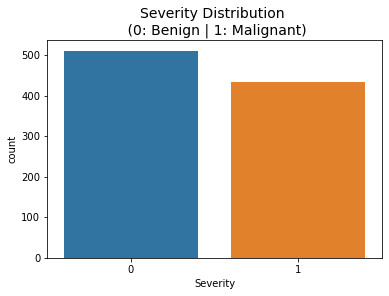

In [152]:
sns.countplot(x='Severity', data=data)
plt.title('Severity Distribution \n (0: Benign | 1: Malignant)', fontsize=14)

print('Benign: ', round(data['Severity'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Malignant: ', round(data['Severity'].value_counts()[1]/len(data) * 100,2), '% of the dataset')


Text(0.5, 1.0, 'Benign - Age')

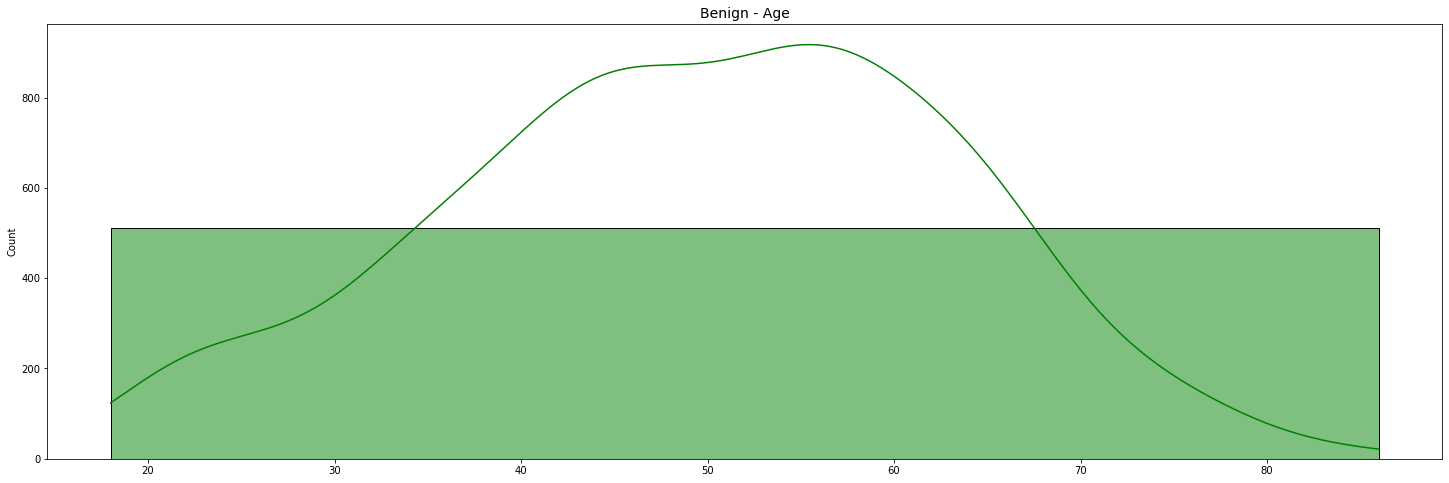

In [153]:
age_benign = data.Age[data.Severity == 0].values

bins = int(data['Age'].max()) - int(data['Age'].min())

plt.figure(figsize=(25,8))

sns.histplot(age_benign, bins=bins, kde=True, color='green', label='Benign')
plt.title('Benign - Age', fontsize=14)

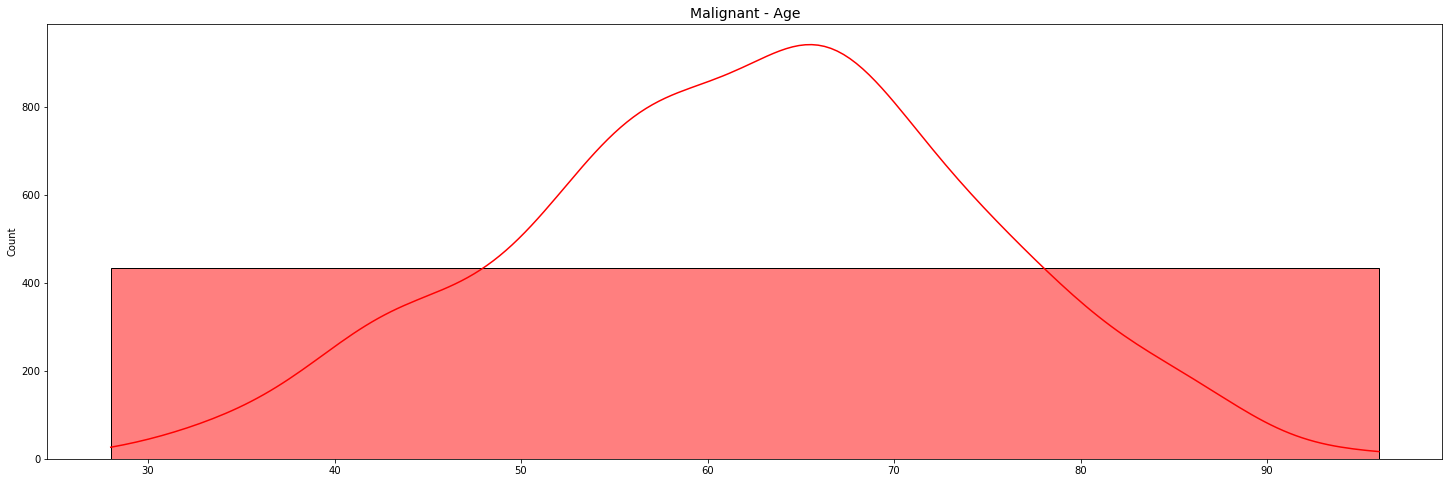

In [154]:
age_malign = data.Age[data.Severity == 1].values

bins = int(data['Age'].max()) - int(data['Age'].min())

plt.figure(figsize=(25,8))

sns.histplot(age_malign, bins=bins, kde=True, color='red', label='Malignant')
plt.title('Malignant - Age', fontsize=14)

Correlation Matrices

Text(0.5, 1.0, 'Correlation Matrix')

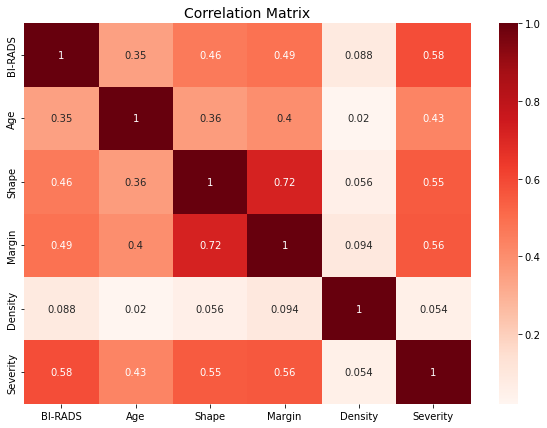

In [155]:
corr = data.corr()

plt.figure(figsize=(10, 7))

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix', fontsize=14)

Text(0.5, 1.0, 'Severity - Margin')

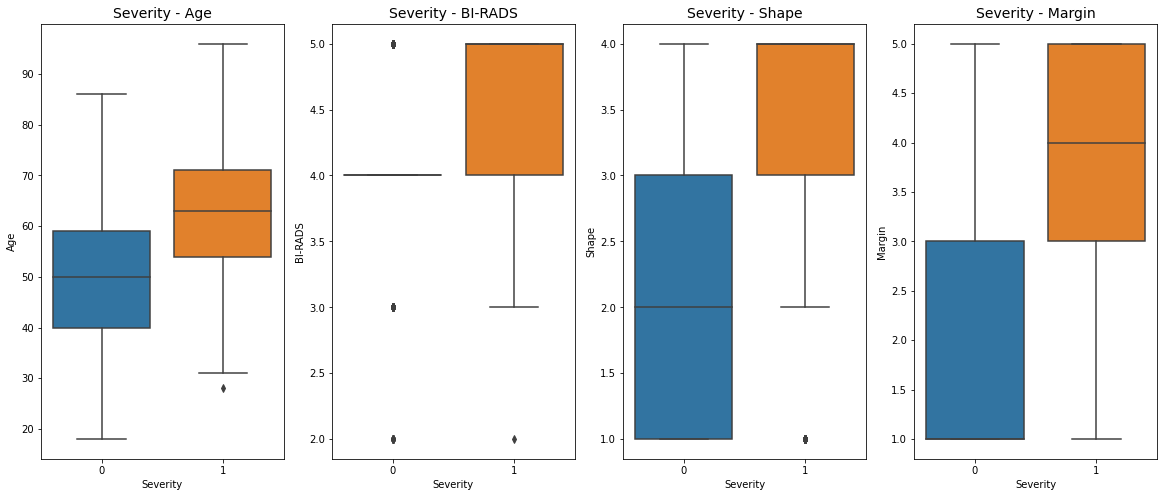

In [156]:
f, axes = plt.subplots(ncols=4, figsize=(20, 8))

sns.boxplot(x='Severity', y='Age', data=data, ax=axes[0])
axes[0].set_title('Severity - Age', fontsize=14) 

sns.boxplot(x='Severity', y='BI-RADS', data=data, ax=axes[1])
axes[1].set_title('Severity - BI-RADS', fontsize=14) 

sns.boxplot(x='Severity', y='Shape', data=data, ax=axes[2])
axes[2].set_title('Severity - Shape', fontsize=14)

sns.boxplot(x='Severity', y='Margin', data=data, ax=axes[3])
axes[3].set_title('Severity - Margin', fontsize=14) 
